In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.signal import firwin
from scipy.signal import freqz
from scipy.signal import find_peaks_cwt
from scipy.signal import butter, lfilter
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot

%matplotlib inline

ordata = np.genfromtxt("team9_assignment8_sitting.csv", dtype=float, delimiter=',', names=True)
timestamp = ordata['time']
scaler = preprocessing.MinMaxScaler()
# normazile data
IR = scaler.fit_transform(ordata['IR'])
RED = scaler.fit_transform(ordata['RED'])


# butter filter
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b, a = butter(order, [low, high], btype='band', analog = False)
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def caculateRate(timestamp, data, thres, min_dist, fs):
    peakind = peakutils.indexes(data, thres, min_dist)
    numberOfPeak = len(peakind)
    print "number of peak %d" % numberOfPeak
    rate = np.zeros(numberOfPeak - 1)
    for i in range(1, numberOfPeak):
        interval =  timestamp[peakind[i]]  - timestamp[peakind[i-1]] 
        rate[i-1] =  60 / interval
    return rate




/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and wil

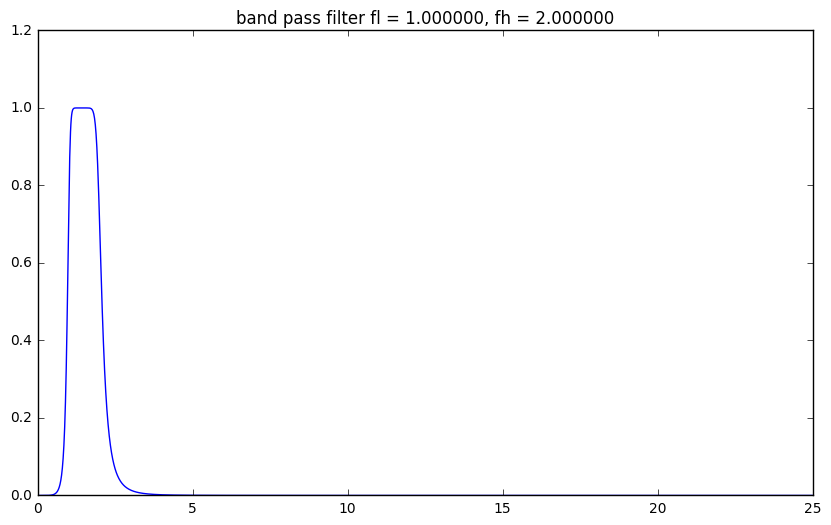

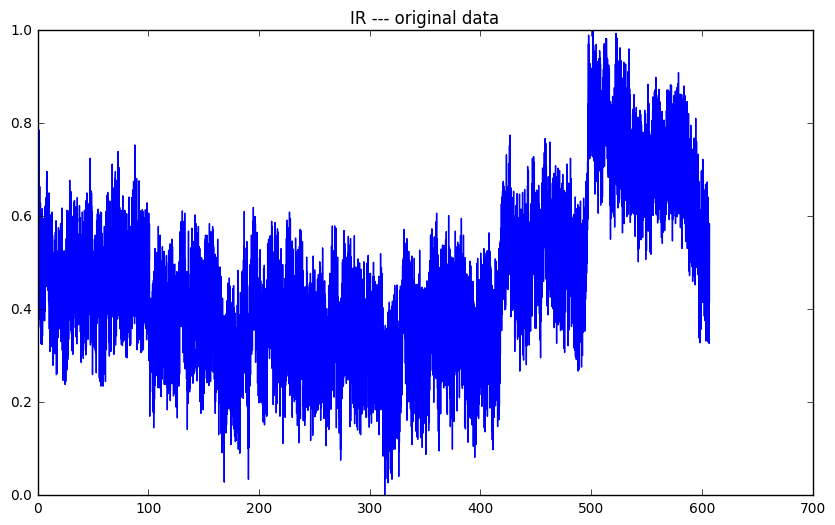

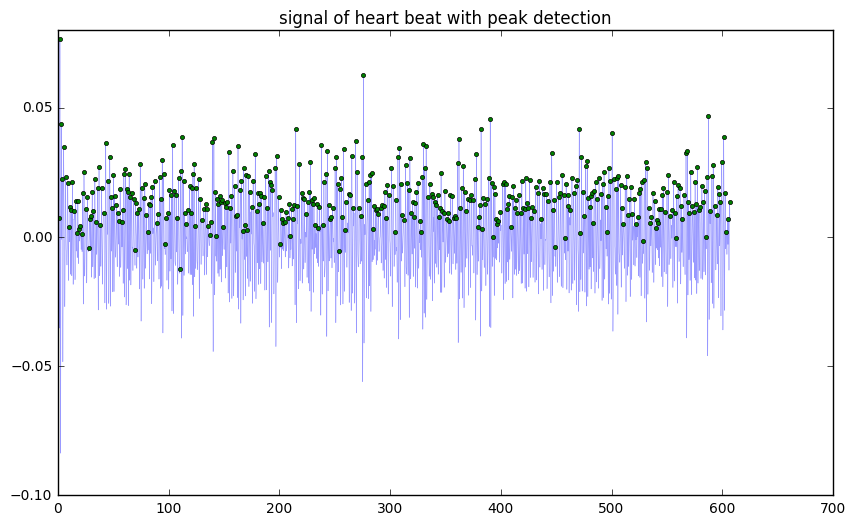

In [42]:
fs = 50.0
lowcut = 1
highcut = 2
order = 5
data = IR
time = timestamp
thres=0.2
min_dist= 20
# lowcut = 1/6.0
# highcut = 1/3.0

# Plot the frequency response for a few different orders.
plt.figure(figsize=(10,6))
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.figure(figsize=(10,6))
plt.plot(time, data)
plt.title("IR --- original data")
pyplot.figure(figsize=(10,6))
heartIndex = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[heartIndex],y[heartIndex], marker="o", ls="", ms=3 )
plt.title("signal of heart beat with peak detection")

number of peak 467
the average heart rate is 49.989335
[ 46.875  46.875  46.875 ...,  60.     60.     60.   ]


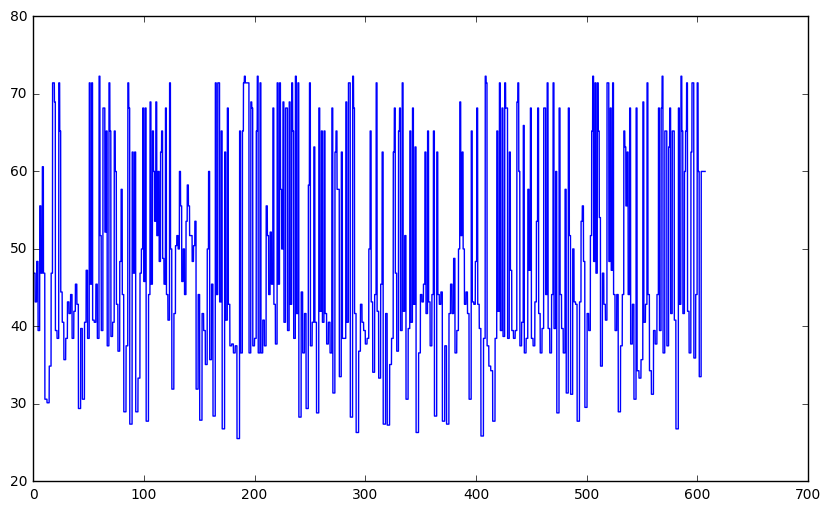

In [9]:
heartRate = caculateRate(time, y, thres,min_dist,fs)
print "the average heart rate is %f"% (np.sum(heartRate)/len(heartRate))

heartBeatArray = np.zeros(len(IR))
count = 1
for i in range(len(heartBeatArray)):
    if i < heartIndex[count] or  count == len(heartRate) - 1 :
        heartBeatArray[i] = heartRate[count - 1]
    else:
        if(count < len(heartRate) - 1):
            count = count + 1
            heartBeatArray[i] = heartRate[count - 1]
print heartBeatArray
plt.figure(figsize=(10,6))
plt.plot(time, heartBeatArray)

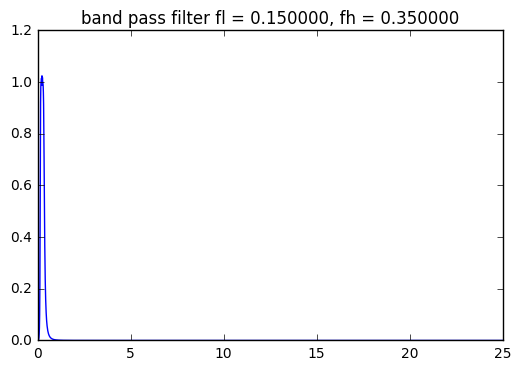

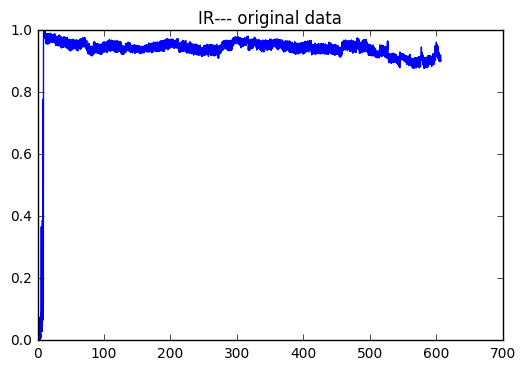

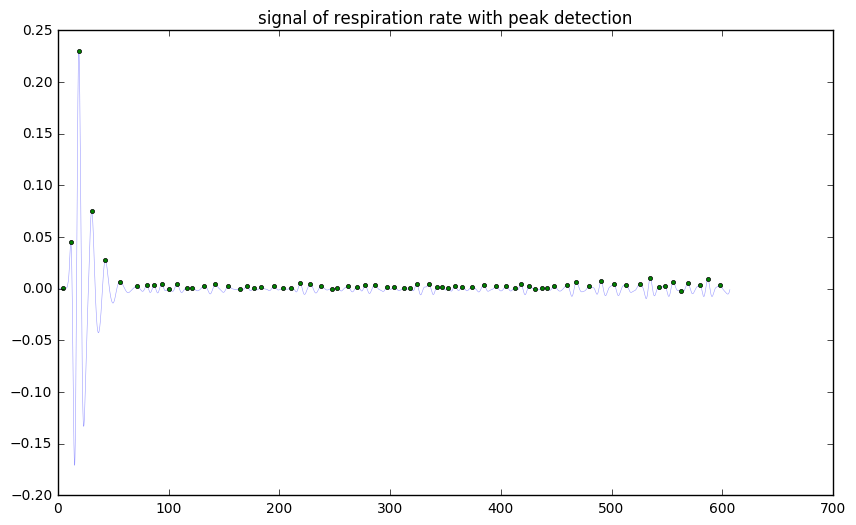

In [10]:
fs = 50.0
lowcut = 0.15
highcut = 0.35
order = 4
data = IR
time = timestamp
thres= 0.01
min_dist = 100
# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.plot(time, data)
plt.title("IR--- original data")
pyplot.figure(figsize=(10,6))
respirationIndex = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[respirationIndex],y[respirationIndex], marker="o", ls="", ms=3 )
plt.title("signal of respiration rate with peak detection")

In [11]:
respirationRate = caculateRate(time, y, thres,min_dist,fs)
# filter abnormal result
result = [x for x in respirationRate if x <= 20 ]
print "the average respiration  rate is %f"% (np.sum(result)/len(result))
print "the real time respiration rate is: \n"
print result

number of peak 71
the average respiration  rate is 7.731158
the real time respiration rate is: 

[8.9418777943368113, 8.2530949105914697, 5.1635111876075728, 4.8622366288492707, 4.5558086560364455, 3.9946737683089206, 6.5934065934065975, 8.9955022488755603, 8.8365243004418375, 9.1185410334346333, 8.1632653061224545, 6.6152149944873262, 13.667425968109338, 5.4446460980036315, 5.9642147117296211, 5.11073253833049, 5.8479532163742745, 9.4488188976378034, 9.1603053435114337, 8.8365243004418375, 5.2539404553414988, 7.0257611241217868, 8.3916083916083846, 7.5471698113207655, 6.4794816414686691, 6.1349693251533735, 6.0301507537688508, 14.051522248243526, 6.2893081761006338, 6.8571428571428568, 8.3565459610027784, 7.1174377224199228, 5.2173913043478262, 9.5693779904306506, 6.8965517241379404, 10.22146507666098, 10.582010582010552, 5.4249547920433985, 7.9470198675496571, 13.422818791946398, 10.889292196007277, 10.016694490818015, 8.9418777943368379, 6.6740823136818621, 5.8939096267190534, 5.347

[  123   291   473   764  1073  1403  1779  2007  2174  2344  2509  2693
  2920  3030  3306  3558  3852  4109  4268  4432  4602  4888  5102  5281
  5480  5712  5957  6206  6313  6552  6771  6951  7162  7450  7607  7825
  7972  8114  8391  8580  8692  8830  8980  9148  9373  9628  9909 10138
 10338 10475 10666 10781 10944 11056 11227 11520 11728 12019 12286 12571
 12839 13164 13398 13589 13721 13917 14085 14246 14520 14699 14973]


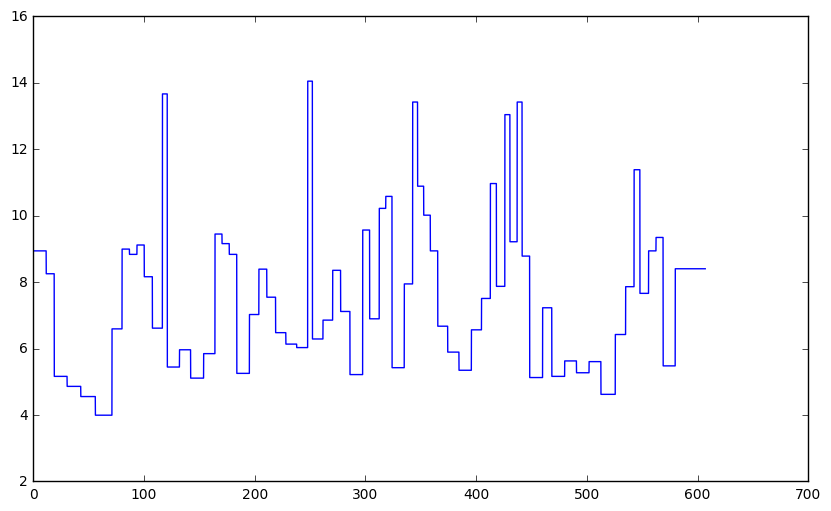

In [12]:

for i in range(len(respirationRate)):
    if respirationRate[i] > 20:
        respirationRate[i] = respirationRate[i - 1]

print respirationIndex
respirationArray = np.zeros(len(IR))
count = 1
for i in range(len(respirationArray)):
    if i < respirationIndex[count] or  count == len(respirationRate) - 1 :
        respirationArray[i] = respirationRate[count - 1]
    else:
        if(count < len(respirationRate) - 1):
            count = count + 1
            respirationArray[i] = respirationRate[count - 1]
plt.figure(figsize=(10,6))
plt.plot(time, respirationArray)

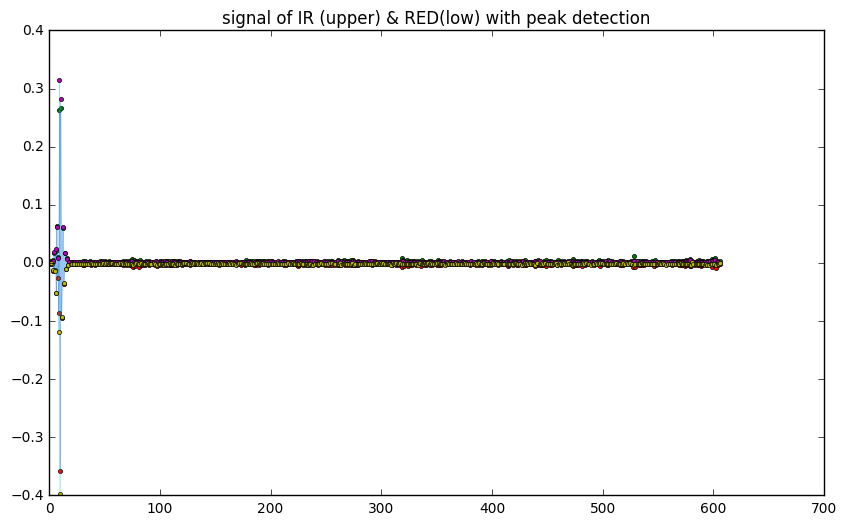

In [13]:
IROrgin = IR
REDOrgin = RED

fs = 50.0
lowcut = 1
highcut = 2
order = 3

IROrgin = butter_bandpass_filter(IROrgin, lowcut, highcut, fs, order)
REDOrgin = butter_bandpass_filter(REDOrgin, lowcut, highcut, fs, order)
time = timestamp
thres=0.05
min_dist=20
pyplot.figure(figsize=(10,6))
# the index of "postive" peak for IR signal
indexPositiveIR = peakutils.indexes(IROrgin, thres, min_dist)
# the index of "negative" peak for IR signal
indexNegativeIR = peakutils.indexes(-1*IROrgin, thres, min_dist)
# the index of "postive" peak for RED signal
indexPositiveRED = peakutils.indexes(REDOrgin, thres, min_dist)
# the index of "negative" peak for RED signal
indexNegativeRED = peakutils.indexes(-1*REDOrgin, thres, min_dist)
# we find the 15th negative peak will be wrong tagged for "RED" signal
# so we manually remove this point from our indexNegativeRED tuple using following code
indexNegativeRED = list(indexNegativeRED)
del indexNegativeRED[14]
plt.plot(time, IROrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveIR],IROrgin[indexPositiveIR], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeIR],IROrgin[indexNegativeIR], marker="o", ls="", ms=3 )
plt.plot(time, REDOrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveRED],REDOrgin[indexPositiveRED], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeRED],REDOrgin[indexNegativeRED], marker="o", ls="", ms=3 )
plt.title("signal of IR (upper) & RED(low) with peak detection")

In [14]:
def calculateDC(data):
    DC = np.zeros(len(data) - 1) 
    for i in range(len(DC)):
        DC[i] = (data[i + 1] + data[i])/2.0
    return DC

def calculateAC(positive, negative):
#     if len (positive) != len(negative):
#          raise ValueError("the input data should has same dimension")
    minLen = min(len(positive), len(negative))
    AC = np.zeros(minLen - 1)
    for i in range(len(AC)):
        AC[i] = positive[i + 1] - negative[i]
    return AC


ACIR = abs(calculateAC(IROrgin[indexPositiveIR], IROrgin[indexNegativeIR]))
ACRED = abs(calculateAC(REDOrgin[indexPositiveRED], REDOrgin[indexNegativeRED]))

minLen = min(len(ACIR), len(ACRED))
ACIR = ACIR[0:minLen]
ACRED = ACRED[0:minLen]
# DCIR = IROrgin[indexNegativeIR]
# DCRED = REDOrgin[indexNegativeRED]
DCIR = abs(calculateDC(indexNegativeIR))
DCRED = abs(calculateDC(indexNegativeRED))

DCIR = DCIR[0:minLen]
DCRED = DCRED[0:minLen]


ratioAverage = (ACRED * DCIR) * 1.0/(ACIR * DCRED)
spo2 = -45.060*ratioAverage* ratioAverage + 30.354 *ratioAverage + 94.845 

for i in range(len(spo2)):
    if spo2[i] < 90:
        spo2[i] = spo2[i-1] 

count = len(spo2) - 1
while(count >= 0):
    if spo2[count] < 90:
        spo2[count] = spo2[count+1]
    count = count - 1

97.1773308062


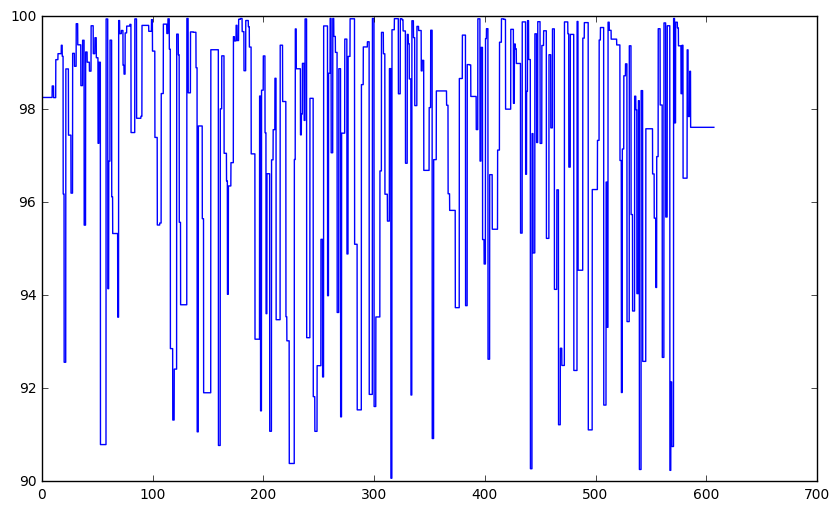

In [15]:
spo2Array = np.zeros(len(IR))
count = 1
for i in range(len(spo2Array)):
    if i < indexPositiveIR[count] or  count == len(spo2) - 1 :
        spo2Array[i] = spo2[count - 1]
    else:
        if(count < len(spo2) - 1):
            count = count + 1
            spo2Array[i] = spo2[count - 1]
plt.figure(figsize=(10,6))
plt.plot(time, spo2Array)
print sum(spo2Array)/len(spo2Array)

In [17]:
saveData = np.zeros((len(IR), 9))
ir = ordata['IR']
red = ordata['RED']
x = ordata["X"]
y = ordata["Y"]
z = ordata["Z"]

for i in range(len(IR)):
    saveData[i, 0] = timestamp[i]
    saveData[i, 1] = ir[i]
    saveData[i, 2] = red[i]
    saveData[i, 3] = x[i]
    saveData[i, 4] = y[i]    
    saveData[i, 5] = z[i]
    saveData[i, 6] = heartBeatArray[i]
    saveData[i, 7] = respirationArray[i]
    saveData[i, 8] = spo2Array[i]

In [18]:
np.savetxt("team9_assignment7_sitting.csv", saveData, fmt='%.3f', header="Time,IR, RED, X, Y, Z, Heart Rate, Resoiration Rate, SPO2", delimiter=',')

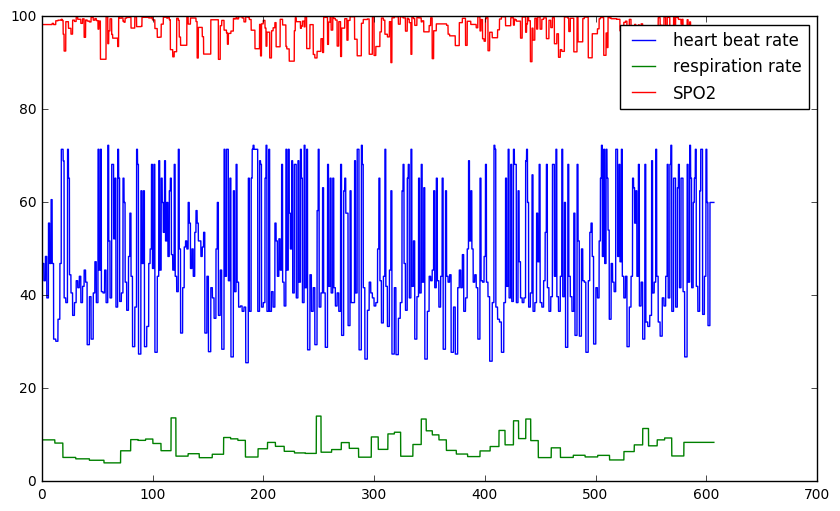

In [19]:
plt.figure(figsize=(10,6))
plt.plot(time, heartBeatArray, label='heart beat rate')
plt.plot(time, respirationArray, label = "respiration rate")
plt.plot(time, spo2Array, label = "SPO2")
plt.legend()

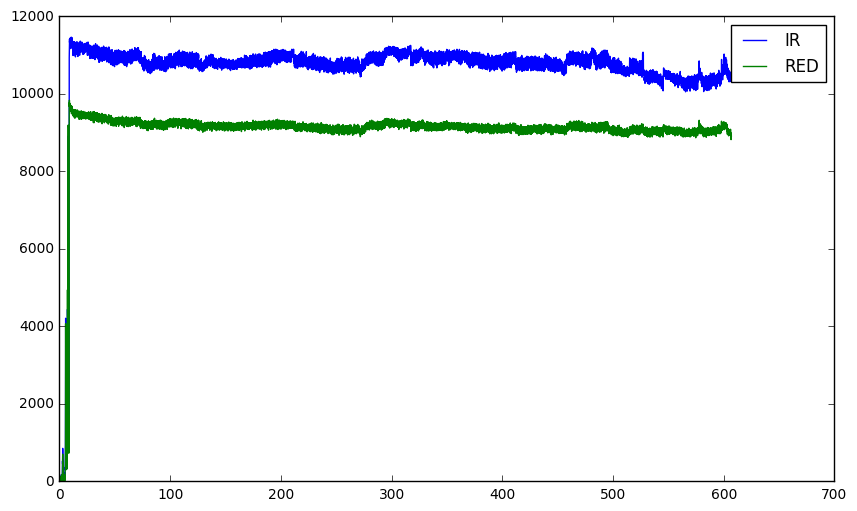

In [20]:
plt.figure(figsize=(10,6))
plt.plot(time, ir, label = "IR")
plt.plot(time, red, label = "RED")
plt.legend()

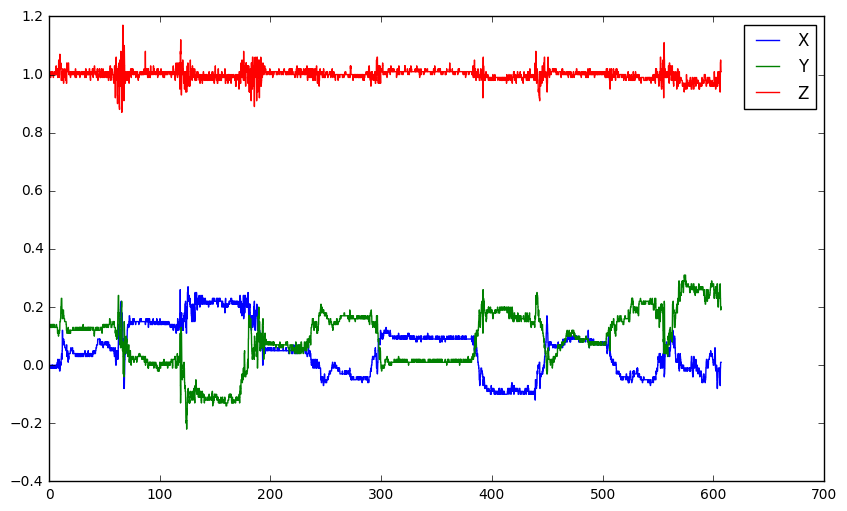

In [21]:
plt.figure(figsize=(10,6))
plt.plot(time, x, label = "X")
plt.plot(time, y, label = "Y")
plt.plot(time, z, label = "Z")

plt.legend()

In [39]:
np.sum(spo2Array)/len(spo2Array)

97.177330806173103

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.signal import firwin
from scipy.signal import freqz
from scipy.signal import find_peaks_cwt
from scipy.signal import butter, lfilter
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot

%matplotlib inline

ordata = np.genfromtxt("team9_assignment8_standing.csv", dtype=float, delimiter=',', names=True)
timestamp = ordata['time']
scaler = preprocessing.MinMaxScaler()
# normazile data
IR = scaler.fit_transform(ordata['IR'])
RED = scaler.fit_transform(ordata['RED'])


# butter filter
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b, a = butter(order, [low, high], btype='band', analog = False)
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def caculateRate(timestamp, data, thres, min_dist, fs):
    peakind = peakutils.indexes(data, thres, min_dist)
    numberOfPeak = len(peakind)
    print "number of peak %d" % numberOfPeak
    rate = np.zeros(numberOfPeak - 1)
    for i in range(1, numberOfPeak):
        interval =  timestamp[peakind[i]]  - timestamp[peakind[i-1]] 
        rate[i-1] =  60 / interval
    return rate

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and wil

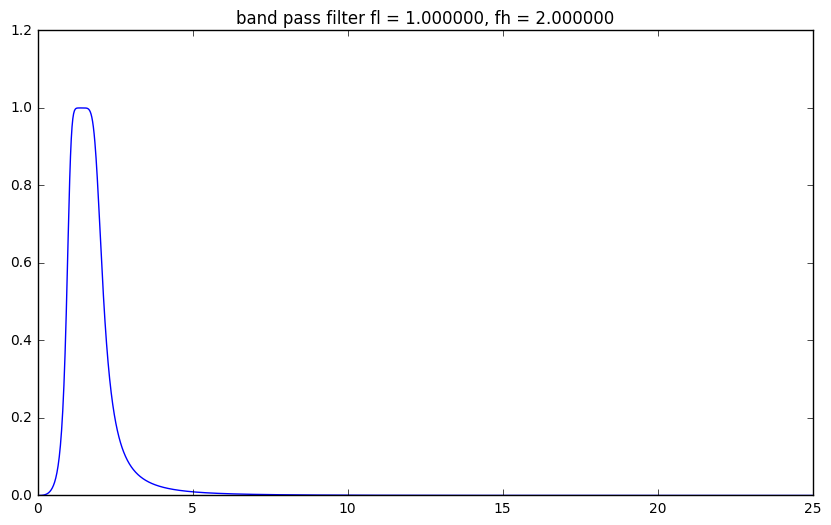

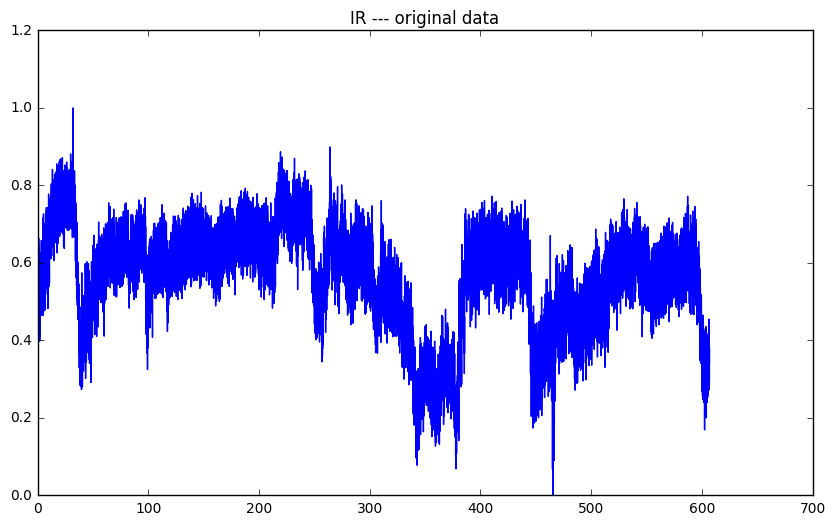

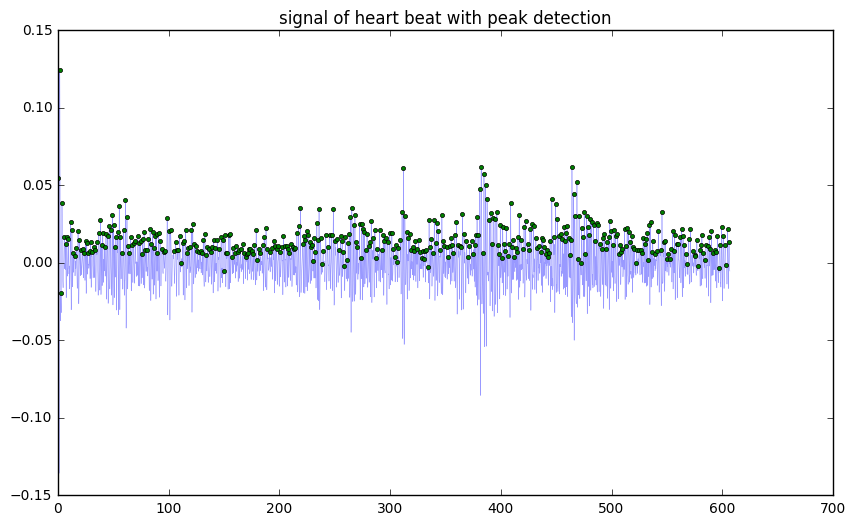

In [72]:
fs = 50.0
lowcut = 1
highcut = 2
order = 3
data = IR
time = timestamp
thres=0.2
min_dist= 20
# lowcut = 1/6.0
# highcut = 1/3.0

# Plot the frequency response for a few different orders.
plt.figure(figsize=(10,6))
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.figure(figsize=(10,6))
plt.plot(time, data)
plt.title("IR --- original data")
pyplot.figure(figsize=(10,6))
heartIndex = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[heartIndex],y[heartIndex], marker="o", ls="", ms=3 )
plt.title("signal of heart beat with peak detection")

number of peak 456
the average heart rate is 47.867022
[ 50.   50.   50.  ...,  62.5  62.5  62.5]


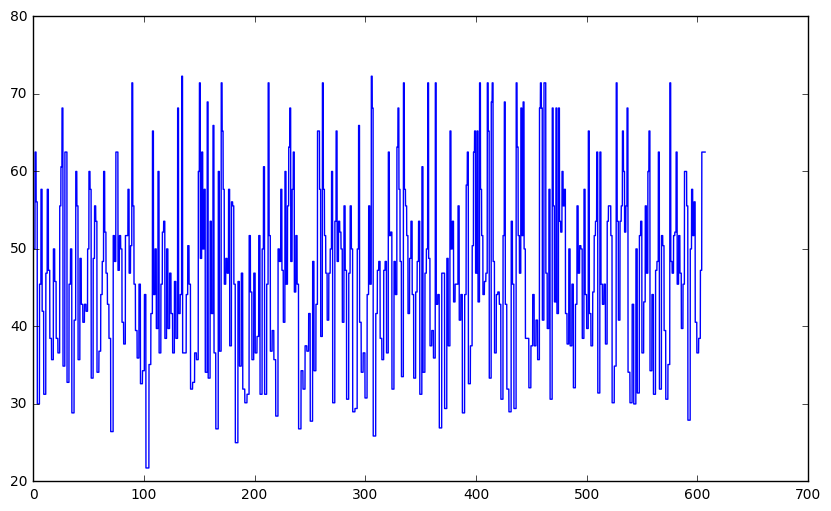

In [74]:
heartRate = caculateRate(time, y, thres,min_dist,fs)
print "the average heart rate is %f"% (np.sum(heartRate)/len(heartRate))


heartBeatArray = np.zeros(len(IR))
count = 1
for i in range(len(heartBeatArray)):
    if i < heartIndex[count] or  count == len(heartRate) - 1 :
        heartBeatArray[i] = heartRate[count - 1]
    else:
        if(count < len(heartRate) - 1):
            count = count + 1
            heartBeatArray[i] = heartRate[count - 1]
print heartBeatArray
plt.figure(figsize=(10,6))
plt.plot(time, heartBeatArray)

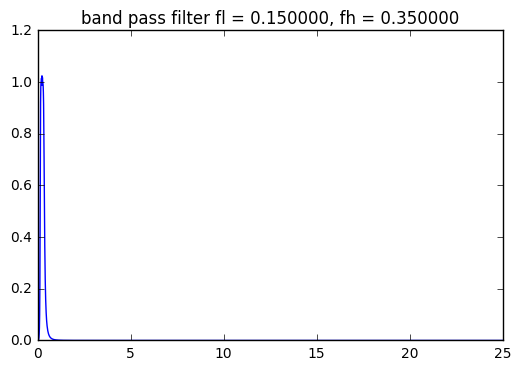

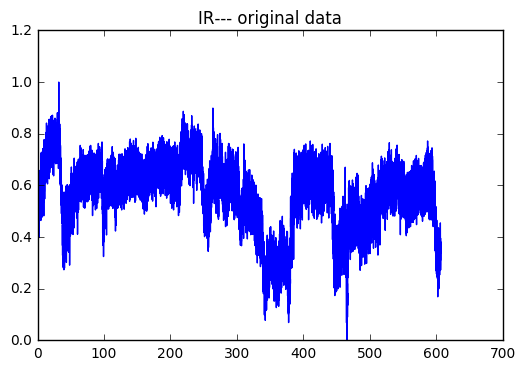

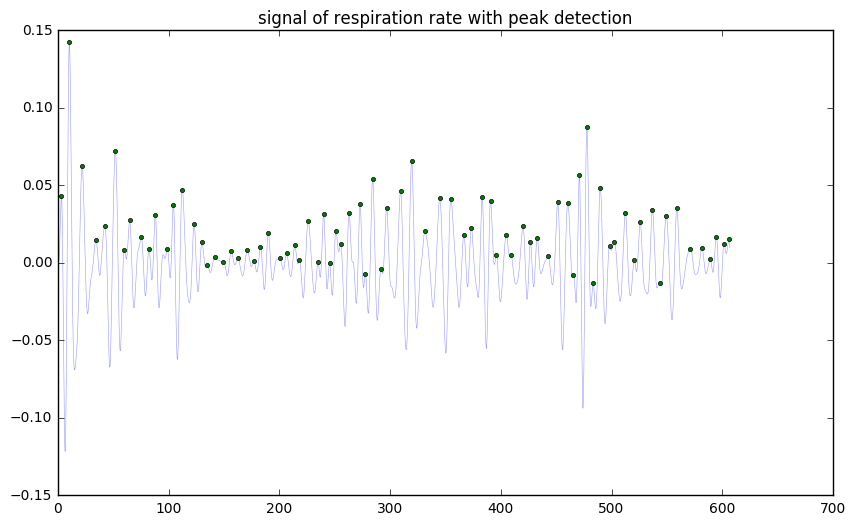

In [75]:
fs = 50.0
lowcut = 0.15
highcut = 0.35
order = 4
data = IR
time = timestamp
thres= 0.01
min_dist = 100
# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.plot(time, data)
plt.title("IR--- original data")
pyplot.figure(figsize=(10,6))
respirationIndex = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[respirationIndex],y[respirationIndex], marker="o", ls="", ms=3 )
plt.title("signal of respiration rate with peak detection")

In [76]:
respirationRate = caculateRate(time, y, thres,min_dist,fs)
# filter abnormal result
result = [x for x in respirationRate if x <= 20 ]
print "the average respiration  rate is %f"% (np.sum(result)/len(result))
print "the real time respiration rate is: \n"
print result

number of peak 79
the average respiration  rate is 8.520921
the real time respiration rate is: 

[8.3449235048678734, 5.2173913043478262, 4.846526655896608, 7.3982737361282371, 6.3157894736842106, 7.3982737361282371, 12.422360248447209, 5.7142857142857144, 8.6830680173661232, 10.434782608695652, 5.4844606946983561, 11.131725417439702, 7.4441687344913259, 5.6285178236397693, 8.4388185654008439, 12.024048096192363, 9.104704097116878, 7.8636959370904078, 8.2079343365253052, 10.152284263959396, 6.9930069930070058, 10.362694300518148, 9.9502487562189028, 8.4388185654008279, 5.8479532163742745, 9.5693779904306062, 8.0753701211305451, 14.598540145985455, 7.5187969924811862, 6.8259385665529075, 11.741682974559721, 11.299435028248583, 10.362694300518099, 14.05152224824362, 7.9051383399209447, 6.0120240480961815, 12.631578947368421, 9.1603053435114337, 7.9051383399209749, 11.834319526627235, 4.7694753577106574, 5.9642147117296211, 5.0083472454090074, 4.4843049327354274, 5.9642147117296211, 5.110

[   79   259   547   857  1060  1298  1501  1622  1885  2058  2202  2476
  2611  2813  3080  3258  3383  3548  3739  3922  4070  4285  4430  4581
  4759  5016  5173  5359  5462  5662  5882  6010  6143  6288  6395  6585
  6835  6954  7118  7308  7435  7750  8002  8302  8637  8889  9183  9352
  9597  9785  9918 10142 10247 10520 10689 10841 11083 11307 11534 11661
 11795 11965 12106 12269 12477 12584 12835 13038 13170 13448 13609 13760
 14000 14308 14566 14754 14892 15067 15175]


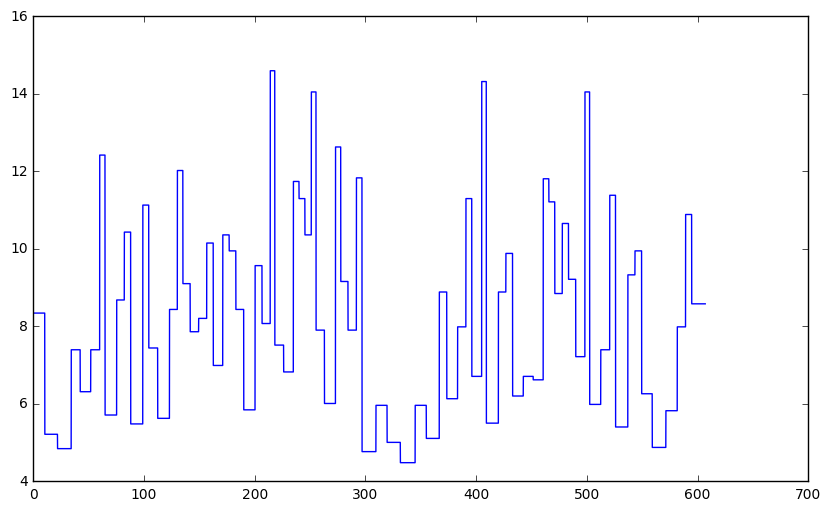

In [77]:
for i in range(len(respirationRate)):
    if respirationRate[i] > 20:
        respirationRate[i] = respirationRate[i - 1]

print respirationIndex
respirationArray = np.zeros(len(IR))
count = 1
for i in range(len(respirationArray)):
    if i < respirationIndex[count] or  count == len(respirationRate) - 1 :
        respirationArray[i] = respirationRate[count - 1]
    else:
        if(count < len(respirationRate) - 1):
            count = count + 1
            respirationArray[i] = respirationRate[count - 1]
plt.figure(figsize=(10,6))
plt.plot(time, respirationArray)

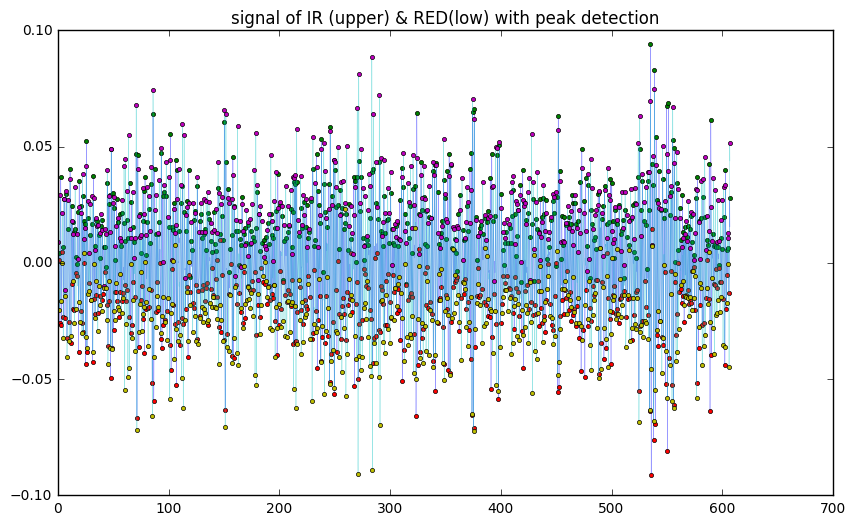

In [62]:
IROrgin = IR
REDOrgin = RED

fs = 50.0
lowcut = 1
highcut = 2
order = 3

IROrgin = butter_bandpass_filter(IROrgin, lowcut, highcut, fs, order)
REDOrgin = butter_bandpass_filter(REDOrgin, lowcut, highcut, fs, order)
time = timestamp
thres=0.05
min_dist=20
pyplot.figure(figsize=(10,6))
# the index of "postive" peak for IR signal
indexPositiveIR = peakutils.indexes(IROrgin, thres, min_dist)
# the index of "negative" peak for IR signal
indexNegativeIR = peakutils.indexes(-1*IROrgin, thres, min_dist)
# the index of "postive" peak for RED signal
indexPositiveRED = peakutils.indexes(REDOrgin, thres, min_dist)
# the index of "negative" peak for RED signal
indexNegativeRED = peakutils.indexes(-1*REDOrgin, thres, min_dist)
# we find the 15th negative peak will be wrong tagged for "RED" signal
# so we manually remove this point from our indexNegativeRED tuple using following code
indexNegativeRED = list(indexNegativeRED)
del indexNegativeRED[14]
plt.plot(time, IROrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveIR],IROrgin[indexPositiveIR], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeIR],IROrgin[indexNegativeIR], marker="o", ls="", ms=3 )
plt.plot(time, REDOrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveRED],REDOrgin[indexPositiveRED], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeRED],REDOrgin[indexNegativeRED], marker="o", ls="", ms=3 )
plt.title("signal of IR (upper) & RED(low) with peak detection")

In [78]:
def calculateDC(data):
    DC = np.zeros(len(data) - 1) 
    for i in range(len(DC)):
        DC[i] = (data[i + 1] + data[i])/2.0
    return DC

def calculateAC(positive, negative):
#     if len (positive) != len(negative):
#          raise ValueError("the input data should has same dimension")
    minLen = min(len(positive), len(negative))
    AC = np.zeros(minLen - 1)
    for i in range(len(AC)):
        AC[i] = positive[i + 1] - negative[i]
    return AC


ACIR = abs(calculateAC(IROrgin[indexPositiveIR], IROrgin[indexNegativeIR]))
ACRED = abs(calculateAC(REDOrgin[indexPositiveRED], REDOrgin[indexNegativeRED]))

minLen = min(len(ACIR), len(ACRED))
ACIR = ACIR[0:minLen]
ACRED = ACRED[0:minLen]
# DCIR = IROrgin[indexNegativeIR]
# DCRED = REDOrgin[indexNegativeRED]
DCIR = abs(calculateDC(indexNegativeIR))
DCRED = abs(calculateDC(indexNegativeRED))

DCIR = DCIR[0:minLen]
DCRED = DCRED[0:minLen]


ratioAverage = (ACRED * DCIR) * 1.0/(ACIR * DCRED)
spo2 = -45.060*ratioAverage* ratioAverage + 30.354 *ratioAverage + 94.845 

for i in range(len(spo2)):
    if spo2[i] < 90:
        spo2[i] = spo2[i-1] 

count = len(spo2) - 1
while(count >= 0):
    if spo2[count] < 90:
        spo2[count] = spo2[count+1]
    count = count - 1

96.6516539292


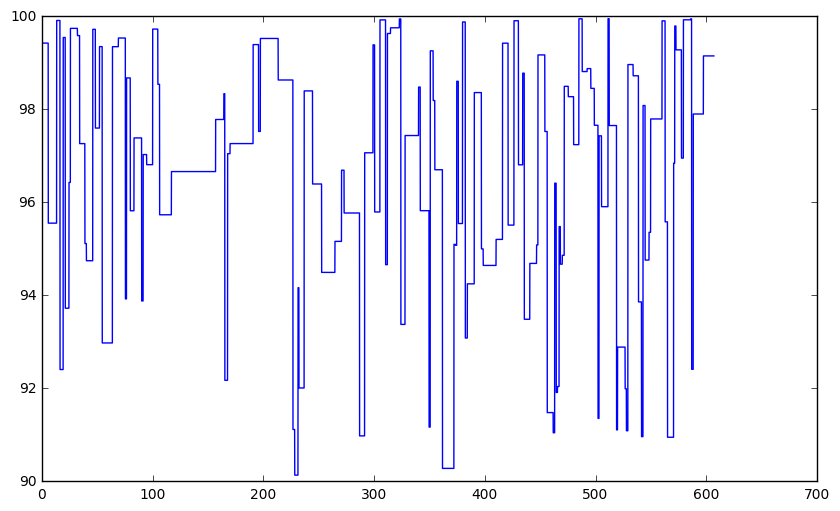

In [64]:
spo2Array = np.zeros(len(IR))
count = 1
for i in range(len(spo2Array)):
    if i < indexPositiveIR[count] or  count == len(spo2) - 1 :
        spo2Array[i] = spo2[count - 1]
    else:
        if(count < len(spo2) - 1):
            count = count + 1
            spo2Array[i] = spo2[count - 1]
plt.figure(figsize=(10,6))
plt.plot(time, spo2Array)
print sum(spo2Array)/len(spo2Array)

In [66]:
saveData = np.zeros((len(IR), 8))

ir = ordata['IR']
red = ordata['RED']
x = ordata["X"]
y = ordata["Y"]
z = ordata["Z"]

for i in range(len(IR)):
    saveData[i, 0] = ir[i]
    saveData[i, 1] = red[i]
    saveData[i, 2] = x[i]
    saveData[i, 3] = y[i]    
    saveData[i, 4] = z[i]
    saveData[i, 5] = heartBeatArray[i]
    saveData[i, 6] = respirationArray[i]
    saveData[i, 7] = spo2Array[i]

In [67]:
np.savetxt("team9_assignment7_walking.csv", saveData, fmt='%.3f', header="IR, RED, X, Y, Z, Heart Rate, Resoiration Rate, SPO2", delimiter=',')

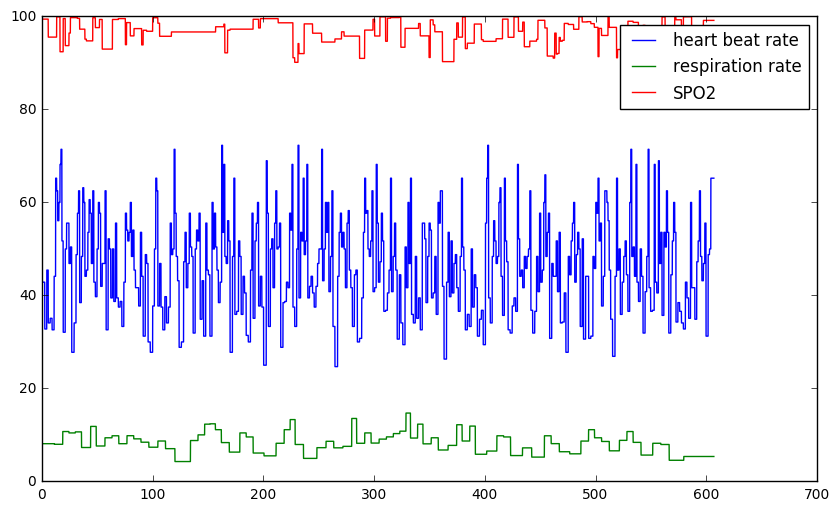

In [68]:
plt.figure(figsize=(10,6))
plt.plot(time, heartBeatArray, label='heart beat rate')
plt.plot(time, respirationArray, label = "respiration rate")
plt.plot(time, spo2Array, label = "SPO2")
plt.legend()

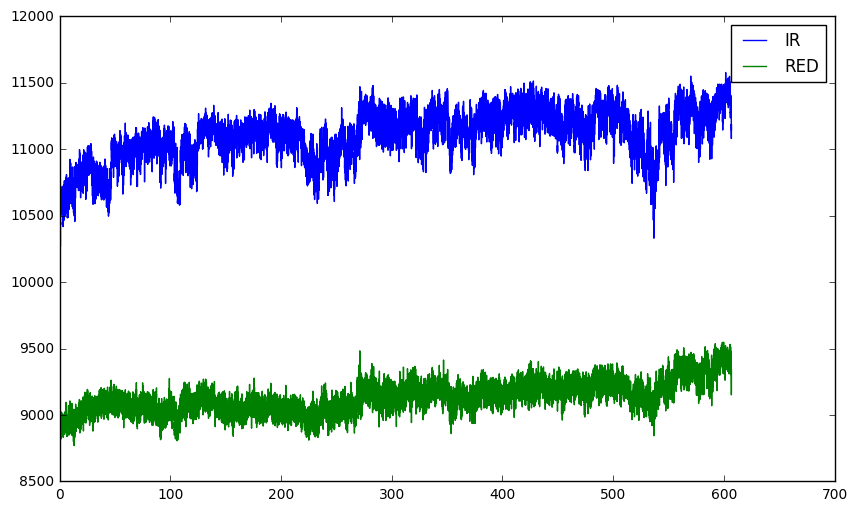

In [69]:
plt.figure(figsize=(10,6))
plt.plot(time, ir, label = "IR")
plt.plot(time, red, label = "RED")
plt.legend()

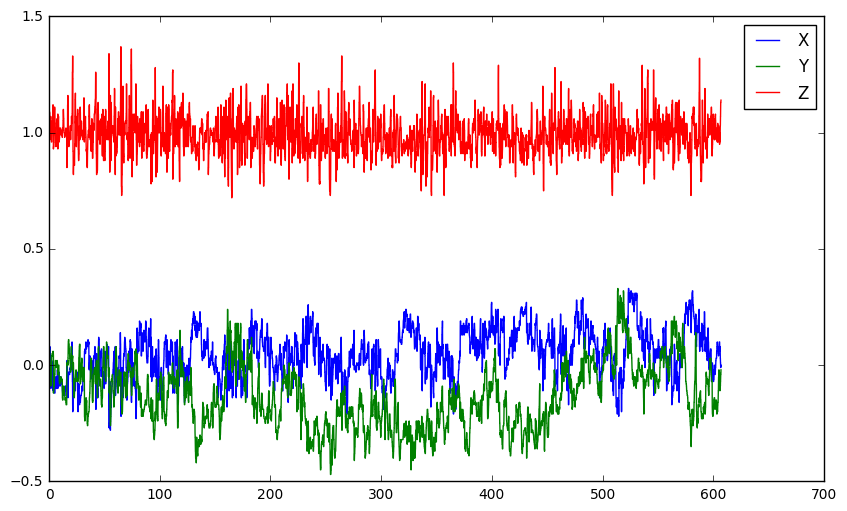

In [70]:
plt.figure(figsize=(10,6))
plt.plot(time, x, label = "X")
plt.plot(time, y, label = "Y")
plt.plot(time, z, label = "Z")

plt.legend()